## More graphs

In this notebook:

- loading and saving graph data into files (and formats for this) also see https://networkx.org/documentation/stable/reference/readwrite/index.html
- using bipartite graphs (with two types of nodes)
- styling graphs


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Loading graphs from files:

### Edgelist (sort of like JSON)

Edgelist looks like below. Format is:

Source Destination {'attribute':value}

```
beyonce mia {'weight': 5}
beyonce azealia {'weight': 1, 'recorded_together': 2}
beyonce jayz {'weight': 1, 'recorded_together': 5}
beyonce madonna {'weight': 1}
azealia madonna {'weight': 1, 'recorded_together': 2}
azealia nicki {'weight': 1}
```

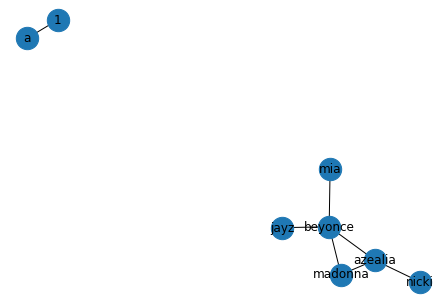

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.read_edgelist('graph_edgelist.csv')

nx.draw(G, with_labels= True, node_size = 500)
plt.show()

And writing them:

In [3]:
# you can also save yoru graph into a file really easilly:
nx.write_edgelist(G,'graph_output_edge_new.csv') # save to a new file

### Adjacency list

Adjacency list looks like below. Format is:

source target target target target

```
beyonce mia azealia jayz madonna
mia
azealia madonna nicki
jayz
madonna
nicki
```

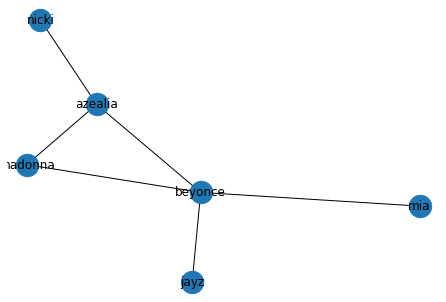

In [4]:
G = nx.read_adjlist('graph_adjacency.csv')

nx.draw(G, with_labels= True, node_size = 500)
plt.show()

In [5]:
nx.write_adjlist(G,'graph_output_adj_new.csv') # save to a new file

### Bipartite graphs

Bipartite graphs contain two types of nodes. They are not a different object, but you can specify the type of connection by using the bipartite attribute:

In [6]:
from networkx.algorithms import bipartite

B = nx.Graph()

# Add nodes with the node attribute "bipartite"
B.add_nodes_from(["jill", "nicky", "tessa", "aga", "ecka", "min", "paola"], bipartite=0)
B.add_nodes_from(["netflix", "facebook", "instagram"], bipartite=1)

B.add_edge('jill','netflix')
B.add_edge('jill','facebook')
B.add_edge('jill','instagram')
B.add_edge('nicky','facebook')
B.add_edge('nicky','instagram')
B.add_edge('tessa','instagram')
B.add_edge('aga','instagram')
B.add_edge('aga','netflix')
B.add_edge('ecka','instagram')
B.add_edge('ecka','facebook')
B.add_edge('min','instagram')
B.add_edge('paola','instagram')


print(B.edges()) #all edges

[('jill', 'netflix'), ('jill', 'facebook'), ('jill', 'instagram'), ('nicky', 'facebook'), ('nicky', 'instagram'), ('tessa', 'instagram'), ('aga', 'instagram'), ('aga', 'netflix'), ('ecka', 'instagram'), ('ecka', 'facebook'), ('min', 'instagram'), ('paola', 'instagram')]


In [7]:
print(bipartite.color(B)) # returns values of 'bipartite' variable


{'jill': 1, 'netflix': 0, 'facebook': 0, 'instagram': 0, 'nicky': 1, 'tessa': 1, 'aga': 1, 'ecka': 1, 'min': 1, 'paola': 1}


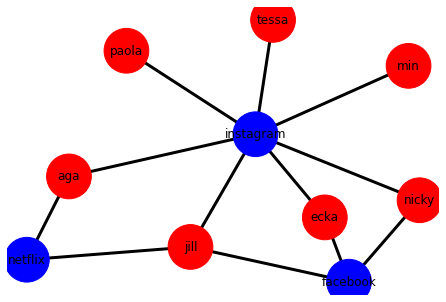

In [8]:
def nodes_colours(graph):
    nodes = graph.nodes() # nodes in correct order
    colours_dict = bipartite.color(graph) # dict with 0 or 1 telling you which group node is in
    return [
        "red" if colours_dict[node] == 1 else "blue"
        for node in nodes
    ]

pos = nx.spring_layout(B)

nx.draw(B, pos, with_labels= True, node_size = 2000, width = 3, node_color = nodes_colours(B)  )
plt.show()

# Another way to style and specify details of a graph:

Let's try this differently:

In [9]:
users = [node for node in B.nodes() if bipartite.color(B)[node]==1]
websites = [node for node in B.nodes() if bipartite.color(B)[node]!=1]
print("websites",websites)
print("users",users)

websites ['netflix', 'facebook', 'instagram']
users ['jill', 'nicky', 'tessa', 'aga', 'ecka', 'min', 'paola']


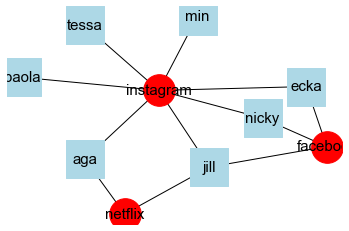

In [10]:
nodePos = nx.spring_layout(B)

nx.draw_networkx_nodes(B, nodePos, nodelist=websites, node_size = 1000, node_color ='red', node_shape ='o')
nx.draw_networkx_nodes(B, nodePos, nodelist=users, node_size=1500, node_color ='lightblue', node_shape ='s')

nx.draw_networkx_labels(B, pos=nodePos, font_size=15, font_family='arial')

nx.draw_networkx_edges(B,nodePos)


plt.axis('off')  #adds border 
plt.show()